In [1]:
# Let's Load all Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load the dataset
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
#To see how many rows and columns in dataset
df.shape

(81, 4)

In [5]:
#To see statistical information
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
#To check the null values
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

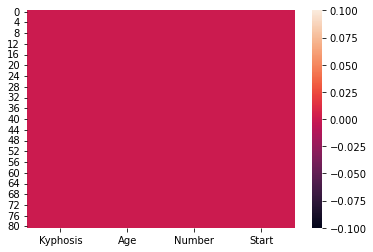

In [7]:
#To visualize the null values if present
sb.heatmap(df.isnull())
plt.show()

In [8]:
#To check the datatypes
df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [9]:
#Lets convert object into numeric data using label encoder
#First calling LabelEncoder class
from sklearn.preprocessing import LabelEncoder
#creating LabelEncoder object
le=LabelEncoder()
#Applying it to object having column
df['Kyphosis']=le.fit_transform(df['Kyphosis'])


In [10]:
#To check datatype again to verify if all colums have numeric data or not
df.dtypes

Kyphosis    int32
Age         int64
Number      int64
Start       int64
dtype: object

In [11]:
#To check if duplicate is present or not
df.duplicated().sum()

0

In [12]:
#To check how many category does output column have'
#Here the output is Kyphosis    
df['Kyphosis'].unique()

array([0, 1])

In [13]:
#To check how many counts of 0 and 1 are there in Kyphosis  column   
df['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

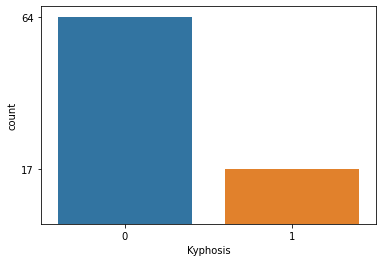

In [14]:
#To visualize the same above using countplot
sb.countplot(data=df,x=df['Kyphosis'])
f=df['Kyphosis'].value_counts()
plt.yticks(f)
plt.show()
#Here we can see that there is alot of difference between 1 and 0 

In [15]:
#To split input and output
X=df.drop('Kyphosis',axis=1) #input
Y=df['Kyphosis'] #output

In [16]:
#To split the data into 70% and 30% ratio
#First call the class
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
#To apply scaling on X_train and X_test columns
#Because scaling is not apply in output column
#First call the class
from sklearn.preprocessing import StandardScaler
#create the object
ss=StandardScaler()
#To apply in on X_train and X_test
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [18]:
#To check the rows and columns after spliting
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((56, 3), (25, 3), (56,), (25,))

In [19]:
#To create the function to perform task faster
#To import cofusion matrix class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def model(object):
    #To train the model
    object.fit(X_train,Y_train)
    #To test the model with 30% data
    Y_pred=object.predict(X_test)
    #To create the confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    return object

In [20]:
#To apply logistic Regression on the model
#First call the class
from sklearn.linear_model import LogisticRegression
#Create the LogisticRegression object
lr=LogisticRegression()

In [21]:
#To give lr object to the function
lr=model(lr)

[[19  0]
 [ 5  1]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [22]:
#Conslusion: Here as we can see that the accuracy is of 1 is not too good
#Because the reason would be the data of output was not balance 
#So we have to first balance the output using RandomOverSampler

In [23]:
#To check how many counts of 0 and 1 are there in Kyphosis  column   
df['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

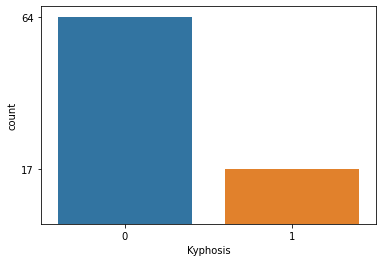

In [24]:
#To visualize the same above using countplot
sb.countplot(data=df,x=df['Kyphosis'])
f=df['Kyphosis'].value_counts()
plt.yticks(f)
plt.show()
#Here we can see that there is alot of difference between 1 and 0 
#Therefore we are getting the accuracy of 1 low
#To improve it we are using RandomOverSampler
#To balance the output

In [25]:
#So to use RandomOverSampler we have to import the class
from imblearn.over_sampling import RandomOverSampler

In [26]:
#To create the RandomOverSampler object
ros=RandomOverSampler(random_state=1)

In [27]:
#To apply the ros object in training data
X_train,Y_train=ros.fit_resample(X_train,Y_train)

In [28]:
#After applying ros on training data
Y_train.value_counts()
#As we can see that after applying randomoversampler the 0 and 1 
#values are balanced

1    45
0    45
Name: Kyphosis, dtype: int64

In [29]:
#Applying same of the testing data
X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [30]:
#After applying ros on training data
Y_test.value_counts()
#Now the values are balanced

0    19
1    19
Name: Kyphosis, dtype: int64

In [31]:
#Giving the balancedata to model function
lr=LogisticRegression()

In [32]:
lr=model(lr)

[[15  4]
 [14  5]]
              precision    recall  f1-score   support

           0       0.52      0.79      0.62        19
           1       0.56      0.26      0.36        19

    accuracy                           0.53        38
   macro avg       0.54      0.53      0.49        38
weighted avg       0.54      0.53      0.49        38



In [33]:
#Conclusion:Now as we can see that the accuracy is good then before but not upto the mark the reason could be overfitting 
# so to increase the accuracy we have to 
#do feature selection using DecisionTree because we dont' have to manually select the features
#We have the decision tree algorithm

In [34]:
#To import the class of Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [35]:
#To create the DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1) #Default using gini index

In [36]:
#To give the object to function
dt=model(dt)

[[17  2]
 [12  7]]
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        19
           1       0.78      0.37      0.50        19

    accuracy                           0.63        38
   macro avg       0.68      0.63      0.60        38
weighted avg       0.68      0.63      0.60        38



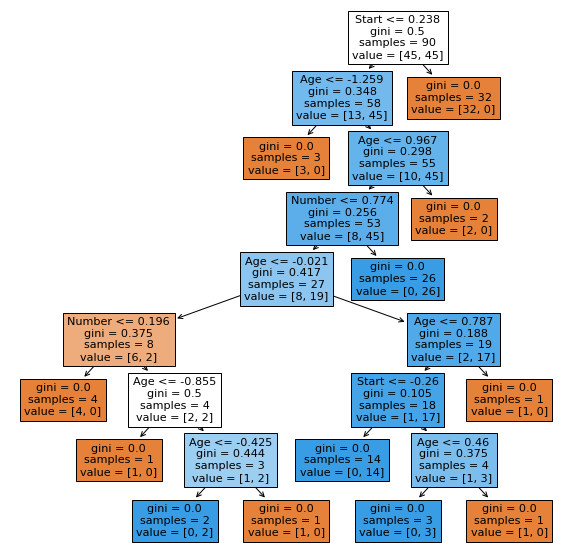

In [37]:
#create a decision tree 
from sklearn import tree
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [38]:
#Dataframe of the Information Gain
dict={'Input':X.columns,'Ig':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('Ig',ascending=False,ignore_index=True)

,Input,Ig
0,Start,0.560366
1,Age,0.365731
2,Number,0.073903


In [39]:
#Conclusion: As we can see that the score it increase from before 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

In [40]:
#Using pruning method 
#create object of DTC class and pass the parameter
#max_depth=8
dt1=DecisionTreeClassifier(random_state=1,max_depth=1)

In [41]:
#Call the function with dt1 object
dt1=model(dt1)

[[12  7]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.63      0.63      0.63        19

    accuracy                           0.63        38
   macro avg       0.63      0.63      0.63        38
weighted avg       0.63      0.63      0.63        38



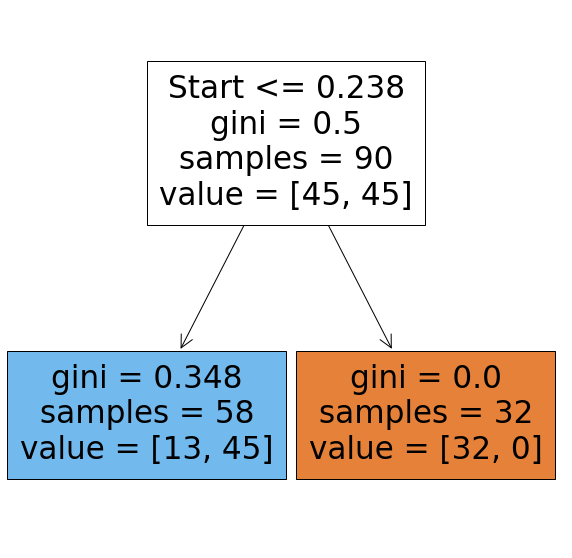

In [42]:
#create a decision tree 
from sklearn import tree
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [43]:
'''
Conclusion:
Here we have applied pruning and we have seen improvement in the accuracy
We got the best accuracy at max_depth 5
'''